<a href="https://colab.research.google.com/github/jgsuarezc/Fotoelasticidad/blob/main/Fotoelastidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import cv2 #RGB imagen
import numpy as np
from google.colab import drive #acceder archivos en el  drive
import matplotlib.pyplot as plt 



In [88]:
drive.mount('/content/drive/')
#funcion guarda el BGR del pixel x,y
def Pixel(NArchivo,x,y):
  img = cv2.imread(NArchivo)

  #dimensiones de la imagen
  #print('Image Dimensions :', img.shape)
  #coordenadas del punto a estudiar
  R=img[x,y,0]
  V=img[x,y,1]
  A=img[x,y,2]
  BGR=[R,V,A]
  return BGR 


#lista guarda la ruta de acceso de las 36  imagenes 
Directorio= ['drive/MyDrive/Datos fotoelasticidad/1.jpg','drive/MyDrive/Datos fotoelasticidad/2.jpg','drive/MyDrive/Datos fotoelasticidad/3.jpg','drive/MyDrive/Datos fotoelasticidad/4.jpg','drive/MyDrive/Datos fotoelasticidad/5.jpg','drive/MyDrive/Datos fotoelasticidad/6.jpg','drive/MyDrive/Datos fotoelasticidad/7.jpg','drive/MyDrive/Datos fotoelasticidad/8.jpg','drive/MyDrive/Datos fotoelasticidad/9.jpg','drive/MyDrive/Datos fotoelasticidad/10.jpg','drive/MyDrive/Datos fotoelasticidad/11.jpg','drive/MyDrive/Datos fotoelasticidad/12.jpg','drive/MyDrive/Datos fotoelasticidad/13.jpg','drive/MyDrive/Datos fotoelasticidad/14.jpg','drive/MyDrive/Datos fotoelasticidad/15.jpg','drive/MyDrive/Datos fotoelasticidad/16.jpg','drive/MyDrive/Datos fotoelasticidad/17.jpg','drive/MyDrive/Datos fotoelasticidad/18.jpg','drive/MyDrive/Datos fotoelasticidad/19.jpg','drive/MyDrive/Datos fotoelasticidad/20.jpg','drive/MyDrive/Datos fotoelasticidad/21.jpg','drive/MyDrive/Datos fotoelasticidad/22.jpg','drive/MyDrive/Datos fotoelasticidad/23.jpg','drive/MyDrive/Datos fotoelasticidad/24.jpg','drive/MyDrive/Datos fotoelasticidad/25.jpg','drive/MyDrive/Datos fotoelasticidad/26.jpg','drive/MyDrive/Datos fotoelasticidad/27.jpg','drive/MyDrive/Datos fotoelasticidad/28.jpg','drive/MyDrive/Datos fotoelasticidad/29.jpg','drive/MyDrive/Datos fotoelasticidad/30.jpg','drive/MyDrive/Datos fotoelasticidad/31.jpg','drive/MyDrive/Datos fotoelasticidad/32.jpg','drive/MyDrive/Datos fotoelasticidad/33.jpg','drive/MyDrive/Datos fotoelasticidad/34.jpg','drive/MyDrive/Datos fotoelasticidad/35.jpg','drive/MyDrive/Datos fotoelasticidad/36.jpg']
#guarda el BGR de la n-esima foto en un arreglo  de tamaño[36 x 3]

M=np.zeros((len(Directorio),3))
n=0
for Foto in Directorio:
 
  BGRN=Pixel(Foto,1930,416)#n-esima foto
  for i in range(3):
    M[n,i]=BGRN[i]
  n=n+1
BGRA=M/255 # intensidad BGR de las 36 imagenes normalizado


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


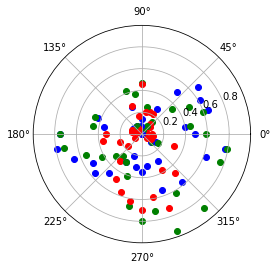

In [89]:
#grafica la intensidad Normalizada vs Angulo  coordenadas polares
fig = plt.figure()
ax = fig.add_subplot(projection="polar")
for i in range(36):
  ax.scatter(2*np.pi/36*i,BGRA[i,0],color = 'blue' )
  ax.scatter(2*np.pi/36*i,BGRA[i,1], color = 'green')
  ax.scatter(2*np.pi/36*i,BGRA[i,2],color = 'red' )

plt.show()